In [63]:
import pandas as pd

In [64]:
#### Importing data

In [65]:
data = pd.read_csv('/Users/ellengallagher/Downloads/Tesla_Deaths.csv')

In [66]:
data

,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,...,Model,AutoPilot claimed,Verified Tesla Autopilot Death,Source,FARS-NHTSA case filing,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,2020,9/17/2020,USA,GA,Tesla loses control and crashes into bus shel...,1,-,-,-,1,...,3,1,-,https://www.ajc.com/news/1-dead-after-tesla-d...,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,09/12/2020,USA,CA,"Car lands on Tesla, other vehicle driver dies",1,-,-,1,-,...,NaN,-,-,https://fox5sandiego.com/news/local-news/1-pe...,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,09/06/2020,USA,IL,"Tesla runs thru red light, crashes, driver di...",1,1,-,-,-,...,NaN,-,-,https://www.dailyherald.com/news/20200906/dri...,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,09/05/2020,China,NaN,"Tesla crashes into crowd, 2 dead and several ...",2,-,-,-,2,...,X,-,-,https://www.globaltimes.cn/content/1200006.sh...,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,8/24/2020,USA,VA,"Two car collision at intersection, other driv...",1,-,-,1,-,...,X,-,-,https://www.loudountimes.com/news/update-mult...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2014,7/14/2014,USA,CA,Tesla kills motorcyclist,1,-,-,1,-,...,NaN,-,-,http://injurylawcentral.com/blog/dwight-dene-...,https://www-fars.nhtsa.dot.gov/QueryTool/Quer...,NaN,NaN,NaN,NaN,NaN
127,2014,07/04/2014,USA,CA,Thief crashes stolen Tesla,1,1,-,-,-,...,NaN,-,-,https://www.theverge.com/2014/7/10/5888463/ca...,https://www-fars.nhtsa.dot.gov/QueryTool/Quer...,NaN,Joshua Slot,NaN,NaN,NaN
128,2014,07/04/2014,USA,CA,Tesla rear ends stopped car,3,-,-,3,-,...,NaN,-,-,https://insideevs.com/3-dead-in-toyota-coroll...,https://www-fars.nhtsa.dot.gov/QueryTool/Quer...,NaN,NaN,NaN,NaN,NaN
129,2013,11/02/2013,USA,CA,Tesla kills cyclist,1,-,-,-,1,...,NaN,-,-,http://www.santacruzsentinel.com/general-news...,No FARS report,NaN,NaN,NaN,NaN,NaN


In [67]:
###
* How many tesla drivers died in total?
* What is the distribution of the total number of deaths per year?
* What is the distribution of the total number of deaths per country?
* How many deaths were other vehicles?
* What is the distribution of the total number of deaths per state in the US?

Object `total` not found.
Object `year` not found.
Object `country` not found.
Object `vehicles` not found.
Object `US` not found.


In [68]:
#### Analyzing data

In [69]:
data.describe()

,Year,Deaths,Deceased 4
count,131.000000,131.000000,0.0
mean,2018.160305,1.137405,NaN
std,1.731237,0.406928,NaN
min,2013.000000,1.000000,NaN
25%,2017.000000,1.000000,NaN
50%,2019.000000,1.000000,NaN
75%,2019.000000,1.000000,NaN
max,2020.000000,3.000000,NaN


In [70]:
data.columns

Index(['Year', 'Date', ' Country ', ' State ', ' Description ', ' Deaths ',
       ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' AutoPilot claimed ', ' Verified Tesla Autopilot Death ', ' Source ',
       ' FARS-NHTSA case filing ', ' Note ', ' Deceased 1 ', ' Deceased 2 ',
       ' Deceased 3 ', ' Deceased 4 '],
      dtype='object')

In [71]:
#### filter the dataset by the columns that will help me to answer the questions

In [72]:
columns = ['Year',' Country ',' State ',' Deaths ',
           ' Tesla driver ',' Tesla occupant ',' Other vehicle ',' Cyclists/ Peds ',' TSLA+cycl / peds ']

In [73]:
data = data[columns]

In [74]:
#### let's check the data type

In [75]:
data.dtypes

Year                   int64
 Country              object
 State                object
 Deaths                int64
 Tesla driver         object
 Tesla occupant       object
 Other vehicle        object
 Cyclists/ Peds       object
 TSLA+cycl / peds     object
dtype: object

In [76]:
##### some columns don't have the correct data type and it has to be fixed

In [77]:
import numpy as np 

In [78]:
#### Check columns

In [79]:
np.unique(data[' Tesla driver '])

array(['  -   ', '1'], dtype=object)

In [80]:
np.unique(data[' Tesla occupant '])

array(['  -   ', ' - ', '1', '2'], dtype=object)

In [81]:
np.unique(data[' Other vehicle '])

array(['  -   ', '1', '2', '3'], dtype=object)

In [82]:
np.unique(data[' Cyclists/ Peds '])

array(['  -   ', ' - ', '1', '2'], dtype=object)

In [83]:
np.unique(data[' TSLA+cycl / peds '])

array(['  -   ', '1', '2', '3'], dtype=object)

In [84]:
np.unique(data['Year'])

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [85]:
np.unique(data[' Country '])

array([' Australia ', ' Austria ', ' Canada ', ' China ', ' Denmark ',
       ' Germany ', ' Holland ', ' Japan ', ' Netherlands ', ' Norway ',
       ' Slovenia ', ' Spain ', ' Switzerland ', ' Taiwan ', ' UK ',
       ' USA ', ' Ukraine '], dtype=object)

In [86]:
np.unique(data[' Deaths '])

array([1, 2, 3])

In [87]:
#### Replace '  -   ',' - ' with '0'

In [88]:
def replace(columnValue,ReplaceWith,toReplace=['  -   ',' - ']):
    if columnValue in toReplace:
        return ReplaceWith
    else:
        return columnValue

In [89]:
### example of how to use the function to replace the strings with '0'

In [90]:
replace(columnValue='1',ReplaceWith='0',toReplace=['  -   ',' - '])

'1'

In [91]:
replace(columnValue='  -   ',ReplaceWith='0',toReplace=['  -   ',' - '])

'0'

In [92]:
replace(columnValue=' - ',ReplaceWith='0',toReplace=['  -   ',' - '])

'0'

In [93]:
### Apply the function to the columns

In [94]:
data[' Tesla driver '] = data[' Tesla driver '].apply(lambda x: replace(columnValue=x,ReplaceWith='0',toReplace=['  -   ',' - ']))

<ipython-input-94-2182ce3fd288>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[' Tesla driver '] = data[' Tesla driver '].apply(lambda x: replace(columnValue=x,ReplaceWith='0',toReplace=['  -   ',' - ']))


In [95]:
data[' Tesla occupant '] = data[' Tesla occupant '].apply(lambda x: replace(columnValue=x,ReplaceWith='0',toReplace=['  -   ',' - ']))

<ipython-input-95-faa70598efb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[' Tesla occupant '] = data[' Tesla occupant '].apply(lambda x: replace(columnValue=x,ReplaceWith='0',toReplace=['  -   ',' - ']))


In [96]:
data[' Other vehicle '] = data[' Other vehicle '].apply(lambda x: replace(columnValue=x,ReplaceWith='0',toReplace=['  -   ',' - ']))

<ipython-input-96-f5121420aa50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[' Other vehicle '] = data[' Other vehicle '].apply(lambda x: replace(columnValue=x,ReplaceWith='0',toReplace=['  -   ',' - ']))


In [97]:
data[' Cyclists/ Peds '] = data[' Cyclists/ Peds '].apply(lambda x: replace(columnValue=x,ReplaceWith='0',toReplace=['  -   ',' - ']))

<ipython-input-97-6c273bd2d613>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[' Cyclists/ Peds '] = data[' Cyclists/ Peds '].apply(lambda x: replace(columnValue=x,ReplaceWith='0',toReplace=['  -   ',' - ']))


In [98]:
data[' TSLA+cycl / peds '] = data[' TSLA+cycl / peds '].apply(lambda x: replace(columnValue=x,ReplaceWith='0',toReplace=['  -   ',' - ']))

<ipython-input-98-6119cd665bff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[' TSLA+cycl / peds '] = data[' TSLA+cycl / peds '].apply(lambda x: replace(columnValue=x,ReplaceWith='0',toReplace=['  -   ',' - ']))


In [99]:
#### change data type from object to interger

In [100]:
columnsToInteger = [' Tesla driver ',' Tesla occupant ',' Other vehicle ',' Cyclists/ Peds ',' TSLA+cycl / peds ']

for c in columnsToInteger:
    data[c] = data[c].astype(int)

<ipython-input-100-86ff098b45f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(int)


In [101]:
##### check data type

In [102]:
data.dtypes

Year                   int64
 Country              object
 State                object
 Deaths                int64
 Tesla driver          int64
 Tesla occupant        int64
 Other vehicle         int64
 Cyclists/ Peds        int64
 TSLA+cycl / peds      int64
dtype: object

In [103]:
data['Year'] = data['Year'].astype(str)

<ipython-input-103-10fae6c115b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Year'].astype(str)


In [104]:
data.dtypes

Year                  object
 Country              object
 State                object
 Deaths                int64
 Tesla driver          int64
 Tesla occupant        int64
 Other vehicle         int64
 Cyclists/ Peds        int64
 TSLA+cycl / peds      int64
dtype: object

In [105]:
#### analyse cleaned data

In [106]:
data.describe()

,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,1.137405,0.328244,0.145038,0.503817,0.152672,0.610687
std,0.406928,0.471377,0.394620,0.648952,0.381763,0.602208
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,3.000000,1.000000,2.000000,3.000000,2.000000,3.000000


In [107]:
data.columns

Index(['Year', ' Country ', ' State ', ' Deaths ', ' Tesla driver ',
       ' Tesla occupant ', ' Other vehicle ', ' Cyclists/ Peds ',
       ' TSLA+cycl / peds '],
      dtype='object')

In [108]:
##### How many people died per year?

In [109]:
question3 = data.groupby(['Year']).agg({' Deaths ':'sum'}).rename(columns={' Deaths ':'number_deaths'})

In [110]:
question3.reset_index(inplace=True)

In [111]:
question3

,Year,number_deaths
0,2013,3
1,2014,6
2,2015,5
3,2016,16
4,2017,12
5,2018,21
6,2019,50
7,2020,36


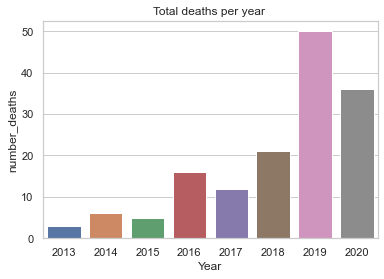

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.title("Total deaths per year ")

ax = sns.barplot(x="Year", y="number_deaths", data=question3)

In [113]:
##### What is the distribution of the total number of deaths per country? 

In [114]:
question = data.groupby([' Country ']).agg({' Deaths ':'sum'}).rename(columns={' Deaths ':'number_deaths'})

In [115]:
question.reset_index(inplace=True)

In [116]:
question

,Country,number_deaths
0,Australia,1
1,Austria,1
2,Canada,7
3,China,4
4,Denmark,1
5,Germany,11
6,Holland,3
7,Japan,3
8,Netherlands,3
9,Norway,4


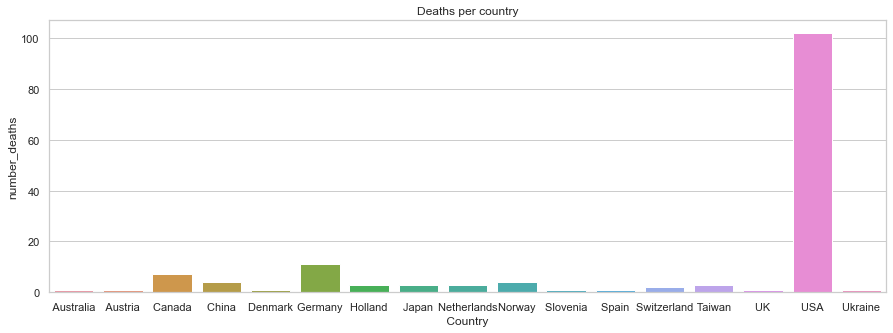

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5)) 
plt.title("Deaths per country")
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=' Country ', y="number_deaths", data=question)
plt.show()


In [148]:
#### How many Tesla desla drivers died per year?

In [149]:
question = data.groupby(['Year']).agg({' Tesla driver ':'sum'}).rename(columns={' Tesla driver ':'number_deaths'})

In [150]:
question.reset_index(inplace=True)

In [151]:
question

,Year,number_deaths
0,2013,0
1,2014,2
2,2015,4
3,2016,5
4,2017,2
5,2018,8
6,2019,11
7,2020,11


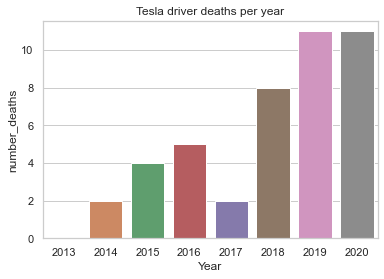

In [155]:
import seaborn as sns
plt.title("Tesla driver deaths per year")
sns.set_theme(style="whitegrid")

ax = sns.barplot(x='Year', y="number_deaths", data=question)


In [123]:
##### How is the distribution of the number of deaths by the Tesla group, other vehicles,  Cyclists/ Peds, TSLA+cycl / peds by State in the US?

In [140]:
question = data.groupby(['Year']).agg({' Other vehicle ':'sum'}).rename(columns={' Other vehicle ':'number_deaths'})

In [141]:
question.reset_index(inplace=True)

In [142]:
question

,Year,number_deaths
0,2013,2
1,2014,4
2,2015,0
3,2016,6
4,2017,7
5,2018,5
6,2019,26
7,2020,16


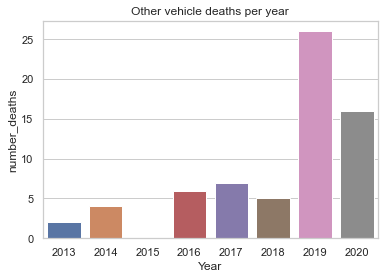

In [146]:
import seaborn as sns
plt.title("Other vehicle deaths per year")
sns.set_theme(style="whitegrid")

ax = sns.barplot(x='Year', y="number_deaths", data=question)

In [127]:
question = data.groupby([' State ']).agg({' Deaths ':'sum'}).rename(columns={' Deaths ':'number_deaths'})

In [128]:
question.reset_index(inplace=True)

In [129]:
question

,State,number_deaths
0,AZ,2
1,CA,49
2,DE,1
3,FL,17
4,GA,3
5,HI,3
6,IA,1
7,IL,2
8,IN,3
9,MO,1


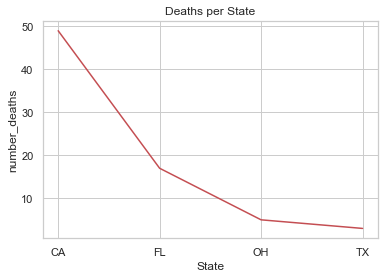

In [130]:
import matplotlib.pyplot as plt
state = ["CA", "FL", "OH", "TX"]
number_deaths = [49, 17, 5, 3]
plt.plot(state, number_deaths, color = "r")
plt.title("Deaths per State")
plt.xlabel('State')
plt.ylabel('number_deaths')
plt.show()

